In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([1, 1]).reshape(-1, 1)

r1 = np.array([0, 0]).reshape(-1, 1)
r1 = np.array([3, 0]).reshape(-1, 1)

std_r = 0.03
std_phi = 0.2

In [3]:
cov = np.array([
    [std_r**2, 0],
    [0, std_phi**2],
])
cov

array([[0.0009, 0.    ],
       [0.    , 0.04  ]])

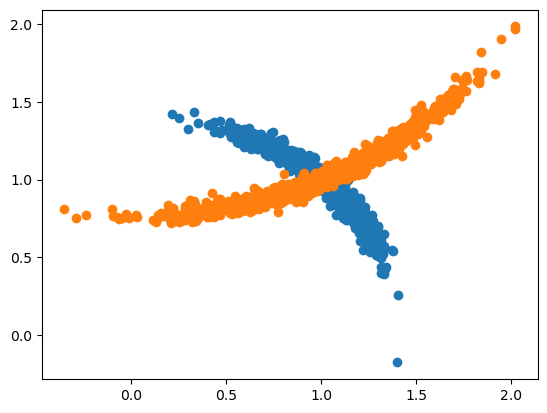

In [4]:
rng = np.random.default_rng()

r1 = np.sqrt(2) + np.random.normal(0, std_r, size=1000)
phi1 = np.pi/4 + np.random.normal(0, std_phi, size=1000)

r2 = np.sqrt(5) + np.random.normal(0, std_r, size=1000)
phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=1000)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2)],
]).squeeze().T

plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1] + 3)
plt.show()

### Метод Монте-Карло

In [5]:
cov_mc1, cov_mc2 = np.cov(x1.T), np.cov(x2.T)

### Линеаризация

In [6]:
y1 = np.array([
    [r1],
    [phi1],
]).squeeze().T

y2 = np.array([
    [r2],
    [phi2],
]).squeeze().T

mean1, mean2 = np.mean(y1, axis=0), np.mean(y2, axis=0)

A1 = np.array([
    [np.cos(mean1[1]), -mean1[0] * np.sin(mean1[1])],
    [np.sin(mean1[1]), mean1[0] * np.cos(mean1[1])],
])

A2 = np.array([
    [np.cos(mean2[1]), -mean2[0] * np.sin(mean2[1])],
    [np.sin(mean2[1]), mean2[0] * np.cos(mean2[1])],
])

cov_lin1, cov_lin2 = A1 @ cov @ A1.T, A2 @ cov @ A2.T

### Сигма-точечное преобразование

In [7]:
vals, P = np.linalg.eig(cov)
P_inv = np.linalg.inv(P)
D = np.diag(vals)

In [8]:
S = P @ np.sqrt(D) @ P_inv

In [11]:
z0 = mean1
w0 = 0.5
zarr1, warr1 = [z0], [w0]
z0, w0

mean = mean1
zarr, warr = zarr1, warr1

n = cov.shape[0]

for j in range(n):
    zp = (mean + (np.sqrt(n / (1 - w0)) * S[:, j]))
    zarr.append(zp)
    warr.append((1 - w0) / 2 / n)
    
    zm = (mean - np.sqrt(n / (1 - w0)) * S[:, j])
    zarr.append(zm)
    warr.append((1 - w0) / 2 / n)
    
z0 = mean2
w0 = 0.5
zarr2, warr2 = [z0], [w0]
z0, w0

mean = mean2
zarr, warr = zarr2, warr2

n = cov.shape[0]

for j in range(n):
    zp = (mean + (np.sqrt(n / (1 - w0)) * S[:, j]))
    zarr.append(zp)
    warr.append((1 - w0) / 2 / n)
    
    zm = (mean - np.sqrt(n / (1 - w0)) * S[:, j])
    zarr.append(zm)
    warr.append((1 - w0) / 2 / n)

In [21]:
Z1 = np.array(zarr1)
Z2 = np.array(zarr2)

In [22]:
dd1 = np.array([
    [Z1[:, 0] * np.cos(Z1[:, 1])],
    [Z1[:, 0] * np.sin(Z1[:, 1])],
]).squeeze().T

dd2 = np.array([
    [Z2[:, 0] * np.cos(Z2[:, 1])],
    [Z2[:, 0] * np.sin(Z2[:, 1])],
]).squeeze().T

In [23]:
cov_z1 = np.cov(dd1.T)
cov_z2 = np.cov(dd2.T)

In [ ]:
r1 = np.sqrt(2) + np.random.normal(0, std_r, size=1)
phi1 = np.pi/4 + np.random.normal(0, std_phi, size=1)

r2 = np.sqrt(5) + np.random.normal(0, std_r, size=1)
phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=1)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2) + 3],
]).squeeze().T

cov_inv1 = np.linalg.inv(cov_mc1)
cov_inv2 = np.linalg.inv(cov_mc2)

answer = np.linalg.inv(cov_inv1 + cov_inv2) @ (cov_inv1 @ x1 + cov_inv2 @ x2)

plt.scatter(answer[0], answer[1], label='monte-carlo')
plt.scatter(1, 1, color='g', label='true')
plt.scatter(0, 0, color='black', label='radar')
plt.scatter(0, 3, color='black', label='radar')
plt.scatter(x1[0], x1[1], color='orange', label='y1')
plt.scatter(x2[0], x2[1], color='cyan', label='y2')

plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()
plt.show()

np.linalg.norm(np.ones_like(x1) - answer)

(1000, 2)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 2)

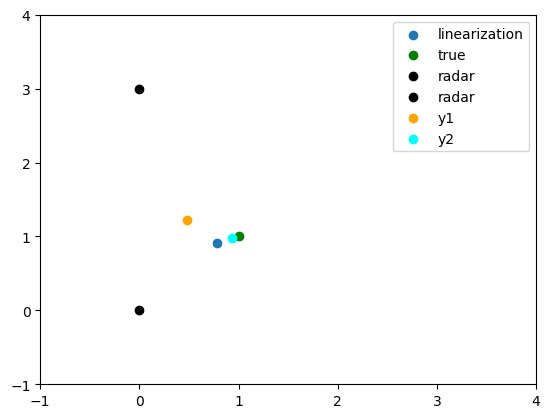

0.23315353062441488

In [37]:
# r1 = np.sqrt(2) + np.random.normal(0, std_r, size=1)
# phi1 = np.pi/4 + np.random.normal(0, std_phi, size=1)

# r2 = np.sqrt(5) + np.random.normal(0, std_r, size=1)
# phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=1)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2) + 3],
]).squeeze().T

cov_inv1 = np.linalg.inv(cov_lin1)
cov_inv2 = np.linalg.inv(cov_lin2)

answer = np.linalg.inv(cov_inv1 + cov_inv2) @ (cov_inv1 @ x1 + cov_inv2 @ x2)

plt.scatter(answer[0], answer[1], label='linearization')
plt.scatter(1, 1, color='g', label='true')
plt.scatter(0, 0, color='black', label='radar')
plt.scatter(0, 3, color='black', label='radar')
plt.scatter(x1[0], x1[1], color='orange', label='y1')
plt.scatter(x2[0], x2[1], color='cyan', label='y2')

plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()
plt.show()

np.linalg.norm(np.ones_like(x1) - answer)

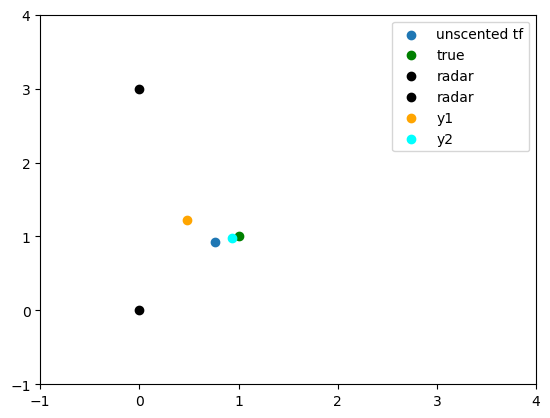

0.24603372476378962

In [38]:
# r1 = np.sqrt(2) + np.random.normal(0, std_r, size=1)
# phi1 = np.pi/4 + np.random.normal(0, std_phi, size=1)

# r2 = np.sqrt(5) + np.random.normal(0, std_r, size=1)
# phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=1)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2) + 3],
]).squeeze().T

cov_inv1 = np.linalg.inv(cov_z1)
cov_inv2 = np.linalg.inv(cov_z2)

answer = np.linalg.inv(cov_inv1 + cov_inv2) @ (cov_inv1 @ x1 + cov_inv2 @ x2)

plt.scatter(answer[0], answer[1], label='unscented tf')
plt.scatter(1, 1, color='g', label='true')
plt.scatter(0, 0, color='black', label='radar')
plt.scatter(0, 3, color='black', label='radar')
plt.scatter(x1[0], x1[1], color='orange', label='y1')
plt.scatter(x2[0], x2[1], color='cyan', label='y2')

plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()
plt.show()

np.linalg.norm(np.ones_like(x1) - answer)

In [ ]:
sz = 10000

r1 = np.sqrt(2) + np.random.normal(0, std_r, size=sz)
phi1 = np.pi/4 + np.random.normal(0, std_phi, size=sz)

r2 = np.sqrt(5) + np.random.normal(0, std_r, size=sz)
phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=sz)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2) + 3],
]).squeeze().T

cov_inv1 = np.linalg.inv(cov_mc1)
cov_inv2 = np.linalg.inv(cov_mc2)

answer = (np.linalg.inv(cov_inv1 + cov_inv2) @ (x1 @ cov_inv1.T + x2 @ cov_inv2.T).T).T

err_mc = np.linalg.norm(answer - np.ones_like(x1), axis=1)

In [62]:
sz = 10000

r1 = np.sqrt(2) + np.random.normal(0, std_r, size=sz)
phi1 = np.pi/4 + np.random.normal(0, std_phi, size=sz)

r2 = np.sqrt(5) + np.random.normal(0, std_r, size=sz)
phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=sz)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2) + 3],
]).squeeze().T

cov_inv1 = np.linalg.inv(cov_lin1)
cov_inv2 = np.linalg.inv(cov_lin2)

answer = (np.linalg.inv(cov_inv1 + cov_inv2) @ (x1 @ cov_inv1.T + x2 @ cov_inv2.T).T).T

err_lin = np.linalg.norm(answer - np.ones_like(x1), axis=1)

In [63]:
sz = 10000

r1 = np.sqrt(2) + np.random.normal(0, std_r, size=sz)
phi1 = np.pi/4 + np.random.normal(0, std_phi, size=sz)

r2 = np.sqrt(5) + np.random.normal(0, std_r, size=sz)
phi2 = np.arctan2(-2, 1) + np.random.normal(0, std_phi, size=sz)

x1 = np.array([
    [r1 * np.cos(phi1)],
    [r1 * np.sin(phi1)],
]).squeeze().T

x2 = np.array([
    [r2 * np.cos(phi2)],
    [r2 * np.sin(phi2) + 3],
]).squeeze().T

cov_inv1 = np.linalg.inv(cov_z1)
cov_inv2 = np.linalg.inv(cov_z2)

answer = (np.linalg.inv(cov_inv1 + cov_inv2) @ (x1 @ cov_inv1.T + x2 @ cov_inv2.T).T).T

err_z = np.linalg.norm(answer - np.ones_like(x1), axis=1)

In [68]:
table = np.hstack([err_mc.reshape(-1, 1), err_lin.reshape(-1, 1), err_z.reshape(-1, 1)])
table.shape

(10000, 3)

In [71]:
a, b, c = 0, 0, 0

for row in table:
    if np.min(row) == row[0]:
        a += 1
    elif np.min(row) == row[1]:
        b += 1
    elif np.min(row) == row[2]:
        c += 1
        
a, b, c

(3355, 3238, 3407)